In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install mtcnn

from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# load image from file
test = plt.imread('/content/drive/MyDrive/mul-face.jpg')

In [13]:
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(test)
results

1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 177ms/step


[{'box': [102, 24, 42, 57],
  'confidence': 0.9999478459358215,
  'keypoints': {'left_eye': (117, 43),
   'right_eye': (136, 47),
   'nose': (127, 59),
   'mouth_left': (114, 65),
   'mouth_right': (132, 68)}},
 {'box': [225, 34, 40, 50],
  'confidence': 0.9998769760131836,
  'keypoints': {'left_eye': (233, 51),
   'right_eye': (252, 51),
   'nose': (241, 61),
   'mouth_left': (234, 69),
   'mouth_right': (251, 70)}},
 {'box': [19, 50, 62, 68],
  'confidence': 0.9998619556427002,
  'keypoints': {'left_eye': (34, 82),
   'right_eye': (56, 68),
   'nose': (49, 87),
   'mouth_left': (49, 104),
   'mouth_right': (68, 93)}},
 {'box': [165, 23, 28, 38],
  'confidence': 0.9996485710144043,
  'keypoints': {'left_eye': (173, 35),
   'right_eye': (186, 35),
   'nose': (179, 44),
   'mouth_left': (174, 51),
   'mouth_right': (185, 52)}}]

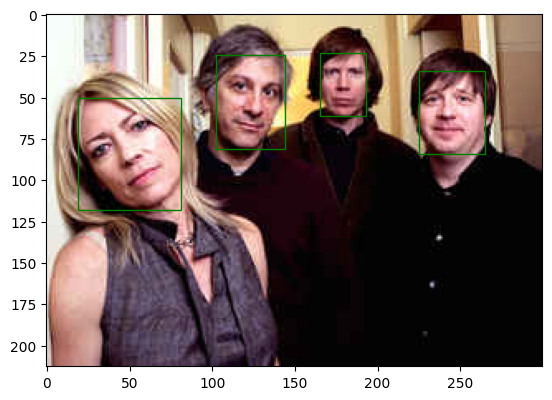

In [14]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        # draw the box
        ax.add_patch(rect)
        # show the plot
    plt.show()

draw_facebox('/content/drive/MyDrive/mul-face.jpg', results)

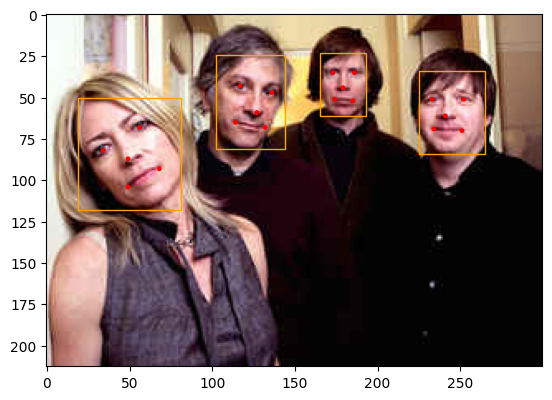

In [15]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=1, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

draw_facebox_and_keypoints('/content/drive/MyDrive/mul-face.jpg', results)